<a href="https://colab.research.google.com/github/zulkernine/MachineLearning/blob/master/fashion_mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import,division,print_function,unicode_literals

#Tensorflow and keras
import tensorflow  as tf
from tensorflow import keras

#Helper library
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


Import the dataset for fashion MNIST

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','coat','Sandal','Shirt','Sneaker','Bag','Ankle bot']
train_images.shape

(60000, 28, 28)

In [5]:
len(train_images)

60000

Inspect a data and preprocess:

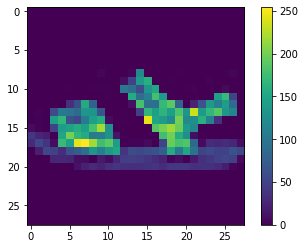

In [6]:
plt.figure()
plt.imshow(train_images[657])
plt.colorbar()
plt.grid(False)
plt.show()

Let's view some more images:

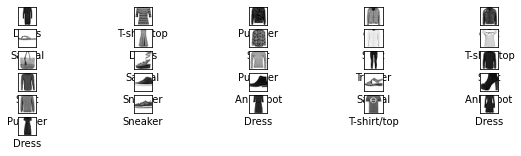

In [7]:
plt.figure(figsize=(10,10))
for i in range(25,51):
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Let's setup the layers:

In [0]:
myModel = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(128,activation='relu'),
                            keras.layers.Dense(128,activation='relu'),
                            keras.layers.Dense(64,activation='relu'),
                            keras.layers.Dense(64,activation='relu'),
                            keras.layers.Dense(10)])

In [0]:
myModel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [32]:
myModel.fit(train_images,train_labels,epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3174 - accuracy: 0.8848
Epoch 2/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3092 - accuracy: 0.8866
Epoch 3/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3049 - accuracy: 0.8888
Epoch 4/15
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3001 - accuracy: 0.8907
Epoch 5/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2955 - accuracy: 0.8913
Epoch 6/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2952 - accuracy: 0.8929
Epoch 7/15
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2921 - accuracy: 0.8931
Epoch 8/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2859 - accuracy: 0.8951
Epoch 9/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2798 - accuracy: 0.8980
Epoch 10/15
60

Evaluate the accuracy:

In [33]:
test_loss,test_acc = myModel.evaluate(test_images,test_labels,verbose=2)

print('\nTEst accuracy: ',test_acc)

10000/10000 - 0s - loss: 0.4067 - accuracy: 0.8715

TEst accuracy:  0.8715


In [0]:
probabilityModel = tf.keras.Sequential([myModel,tf.keras.layers.Softmax()])

In [0]:
predictions = probabilityModel.predict(test_images)

In [36]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 8.6014610e-05, 9.0728242e-37, 3.7025486e-05,
       1.2559196e-19, 9.9987698e-01], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [38]:
test_labels[0]

9

Graph it to look into more data

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Now look into data

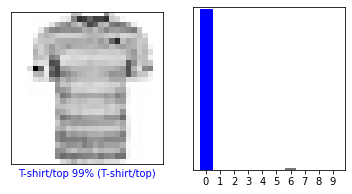

In [40]:
i = 35
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

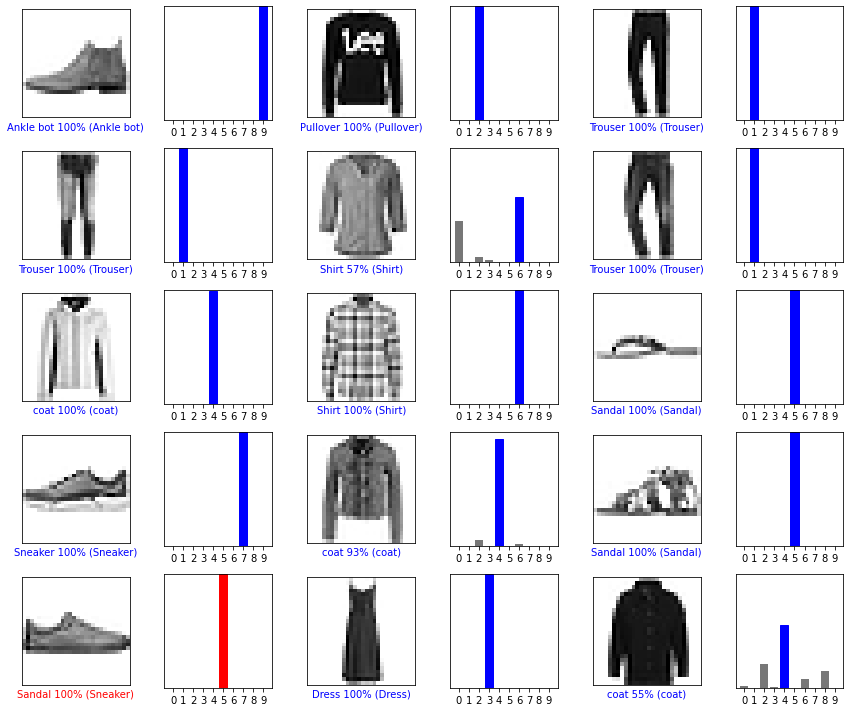

In [41]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()